### Problem Statement:  
The used car market in India is a dynamic and ever-changing landscape. Prices can fluctuate wildly based on a variety of factors including the make and model of the car, its mileage, its condition and the current market conditions. As a result, it can be difficult for sellers to accurately price their cars.

### Objective:  
To build suitable Machine Learning Model for Used Car Price Prediction.

### Univariate Analysis  
Univariate analysis focuses on analyzing a single variable at a time. Its purpose is to understand the distribution, central tendency (mean, median, mode), and spread (variance, standard deviation) of the variable.

Key Characteristics:  

1) Examines one variable in isolation.  
2) Helps to summarize data and detect patterns.  
3) Common methods:  
   For Numerical Data: Histograms, box plots, density plots, descriptive statistics (mean, median, etc.).  
   For Categorical Data: Bar plots, pie charts, frequency counts.  

Example: (House prices)  

   Variable: "Price".  
   1) Plotting a histogram of house prices to observe the distribution.  
   2) Calculating mean, median, standard deviation of prices.  

### Bivariate Analysis  
Bivariate analysis examines the relationship between two variables. It helps determine whether there is an association or correlation between the variables.  

Key Characteristics:   

1) Involves two variables, one dependent and one independent (e.g., X vs. Y).  
2) Explores relationships and trends.  
3) Common methods:  
    For Numerical vs. Numerical: Scatter plots, correlation coefficient.  
    For Categorical vs. Numerical: Box plots, bar charts, t-tests.  
    For Categorical vs. Categorical: Cross-tabulations, chi-square test.  

Example: (House prices.)

Variables: "Price" and "Size".
1) Plotting a scatter plot to see how price varies with size.
2) Calculating the correlation coefficient between price and size.

### Multivariate Analysis:  
Multivariate analysis examines the relationship or patterns among three or more variables simultaneously. It helps to uncover complex relationships in data.

Key Characteristics:  
1) Involves multiple variables (e.g., X1, X2, X3, ...).  
2) Explores interdependencies, clustering, or trends.  
3) Common methods:  
   Visualization: Pair plots, 3D scatter plots, heatmaps.  
   Statistical Techniques: Multiple linear regression, PCA (Principal Component Analysis), k-means clustering, etc.  

Example: (House prices)  
   Variables: "Price", "Size", and "Number of Bedrooms".  
   1) Performing multiple linear regression to predict price based on size and number of bedrooms.  
   2) Creating a pair plot to visualize relationships between all variables.  

In [1]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt 

warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\Nitin Flavier\Desktop\Data Nexus\Data Science\ML_BootCamp\ML_Algos\Random_Forest\Dataset\cardekho_dataset.csv',index_col=[0])
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [2]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [3]:
df.drop(['brand','model'],axis=1,inplace=True)

In [4]:
df.head()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
# getting all the numerical features 
num_features = [f for f in df.columns if df[f].dtype != 'O']
# categorical features 
cat_features = [f for f in df.columns if df[f].dtype == 'O']
# discrete features:
disc_features = [f for f in df.columns if len(df[f].unique()) <= 25]
# continuous features
cont_features = [f for f in df.columns if f not in disc_features]


print("Numerical Features:",len(num_features),num_features)
print("Categorical Features: ",len(cat_features),cat_features)
print("Discrete Features: ",len(disc_features),disc_features)
print("Continuous Features: ",len(cont_features),cont_features)


Numerical Features: 7 ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
Categorical Features:  4 ['car_name', 'seller_type', 'fuel_type', 'transmission_type']
Discrete Features:  5 ['vehicle_age', 'seller_type', 'fuel_type', 'transmission_type', 'seats']
Continuous Features:  6 ['car_name', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


11
Figure(2000x2000)
(4, 3)


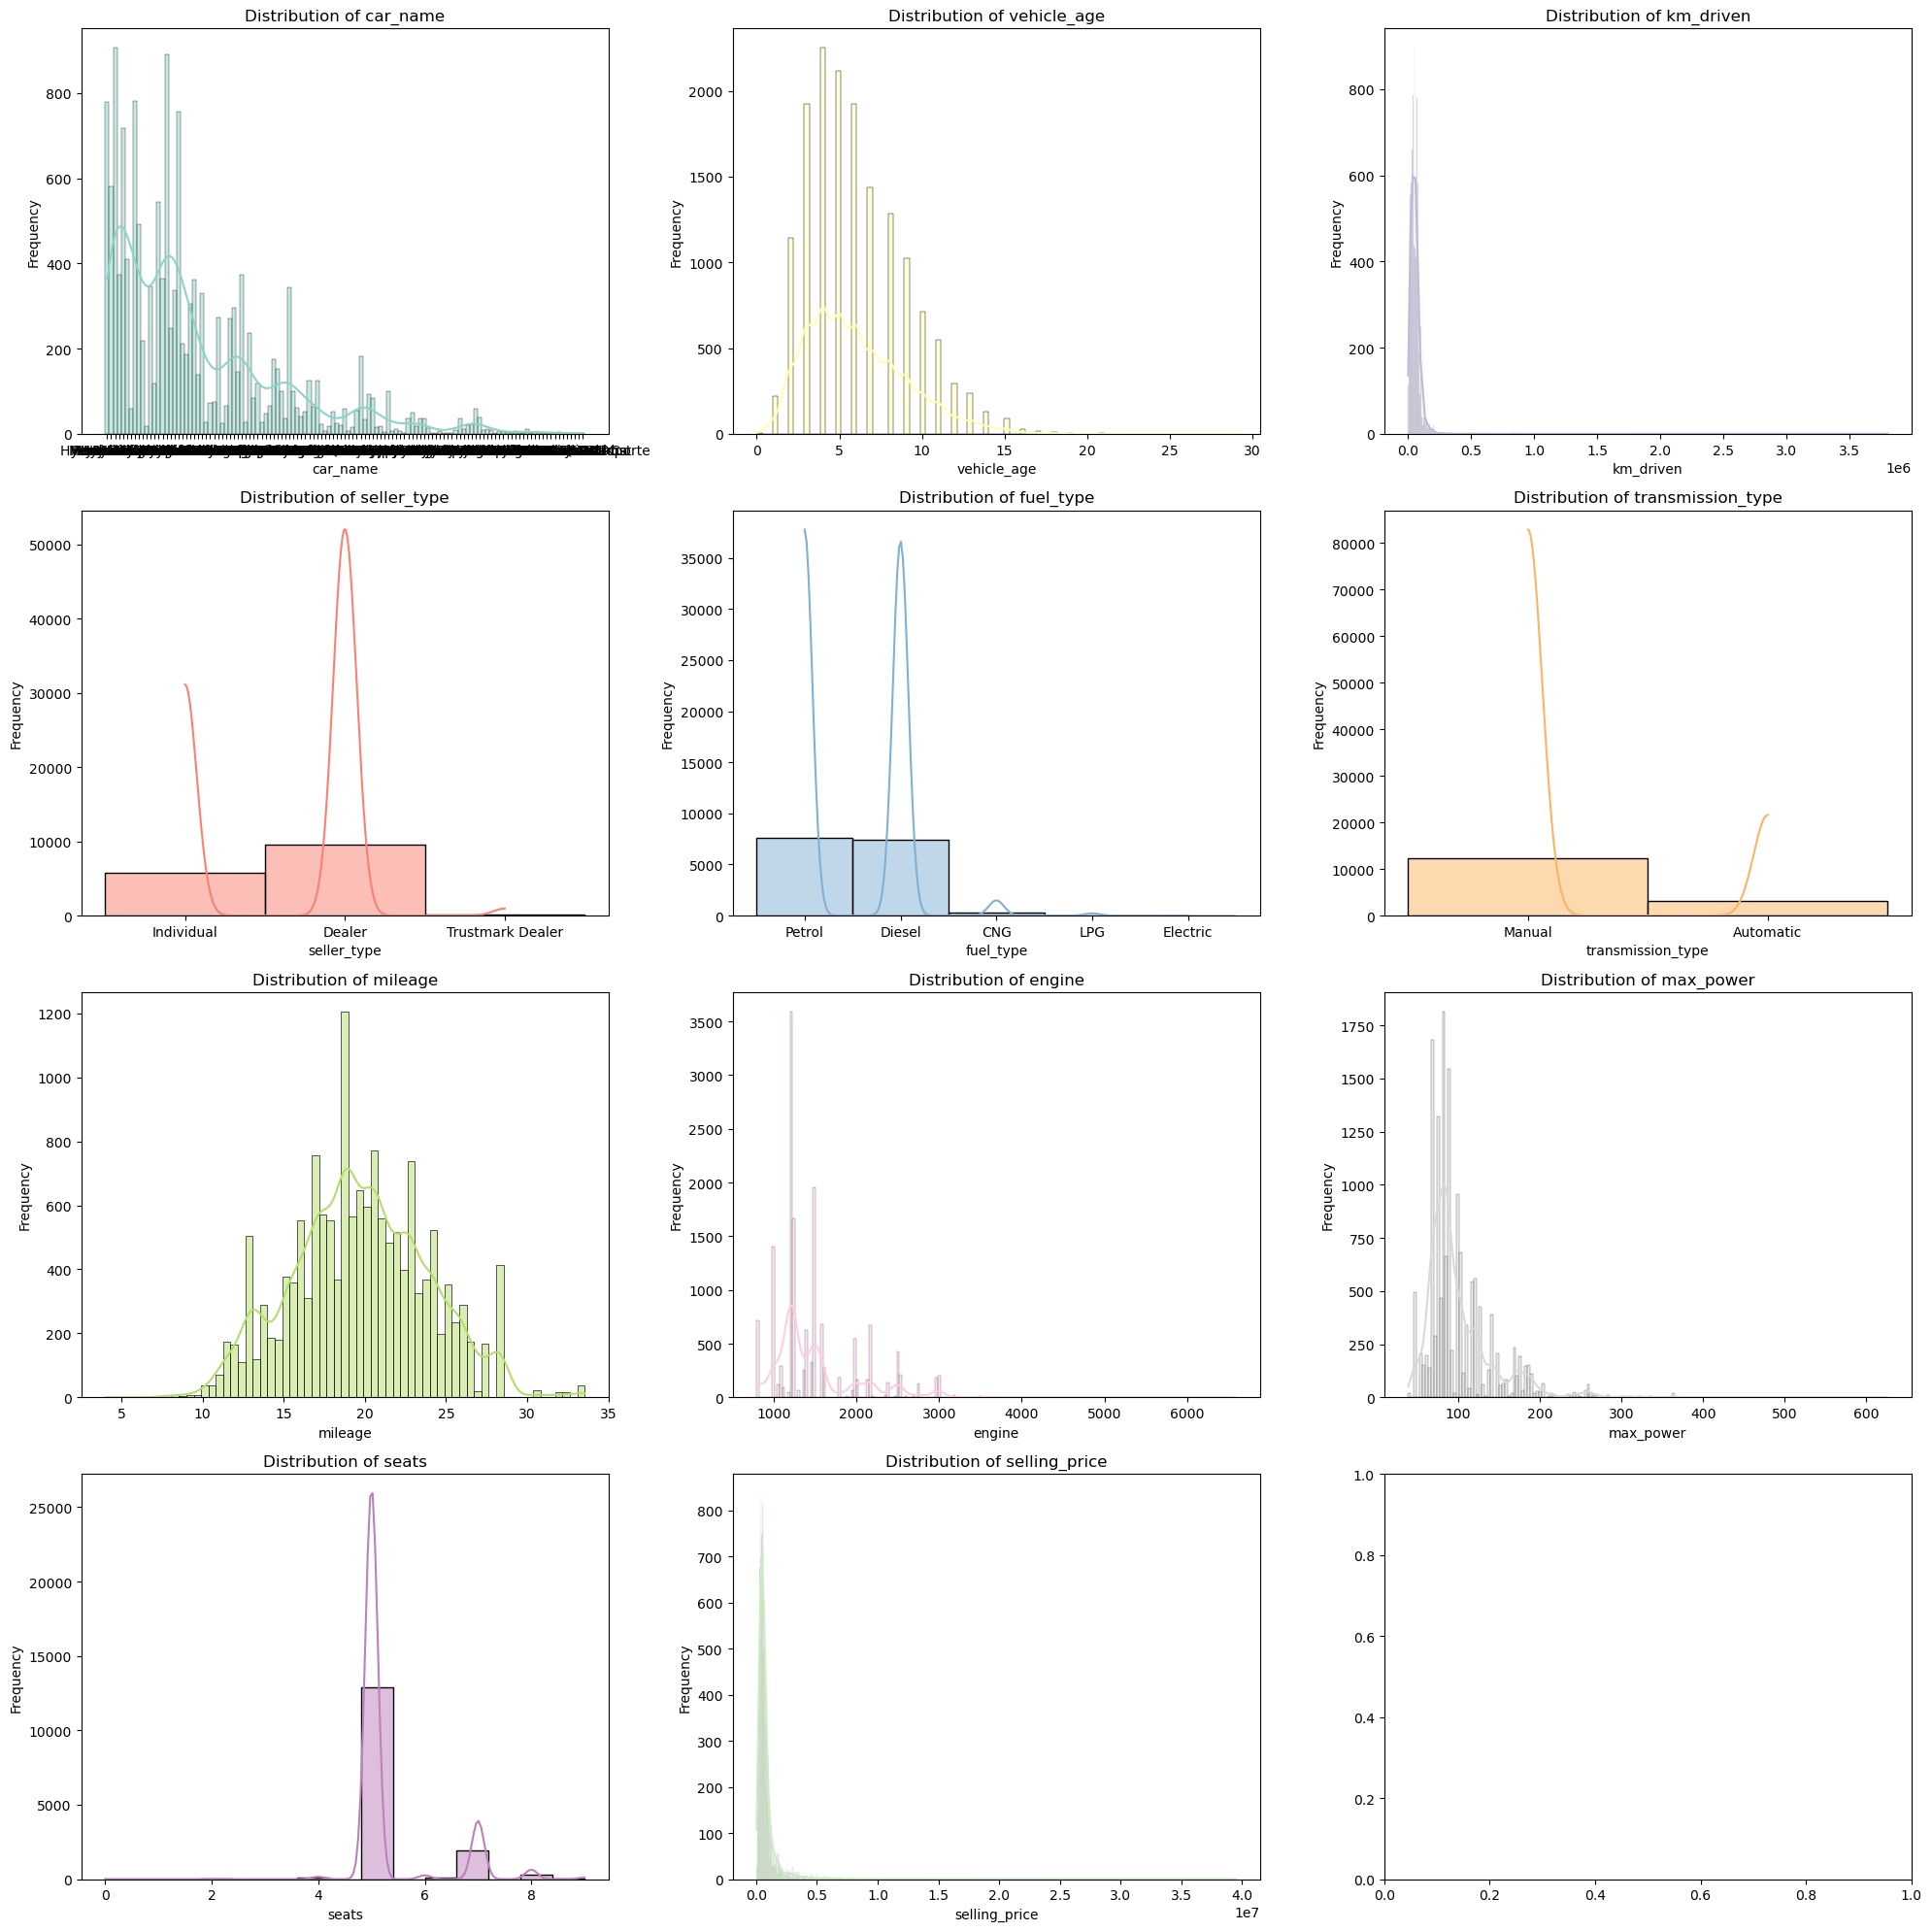

In [6]:
# Finding the distibution of the datapoints

# number of columns to plot:
num_cols = len(df.columns)
print(num_cols)
colors = sns.color_palette("Set3", num_cols)

# # create subplots
fig, axes = plt.subplots(4,3,figsize=(20,20))

print(fig)
print(axes.shape)

# flatten the axes into 1d array
axes = axes.flatten()

for i,feature in enumerate(df.columns):
    # sns.histplot(df[column],kde=True,ax=axes[i])
    sns.histplot(df[feature], kde=True, ax=axes[i],color=colors[i])

    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Figure(2500x2500)
(4, 4)


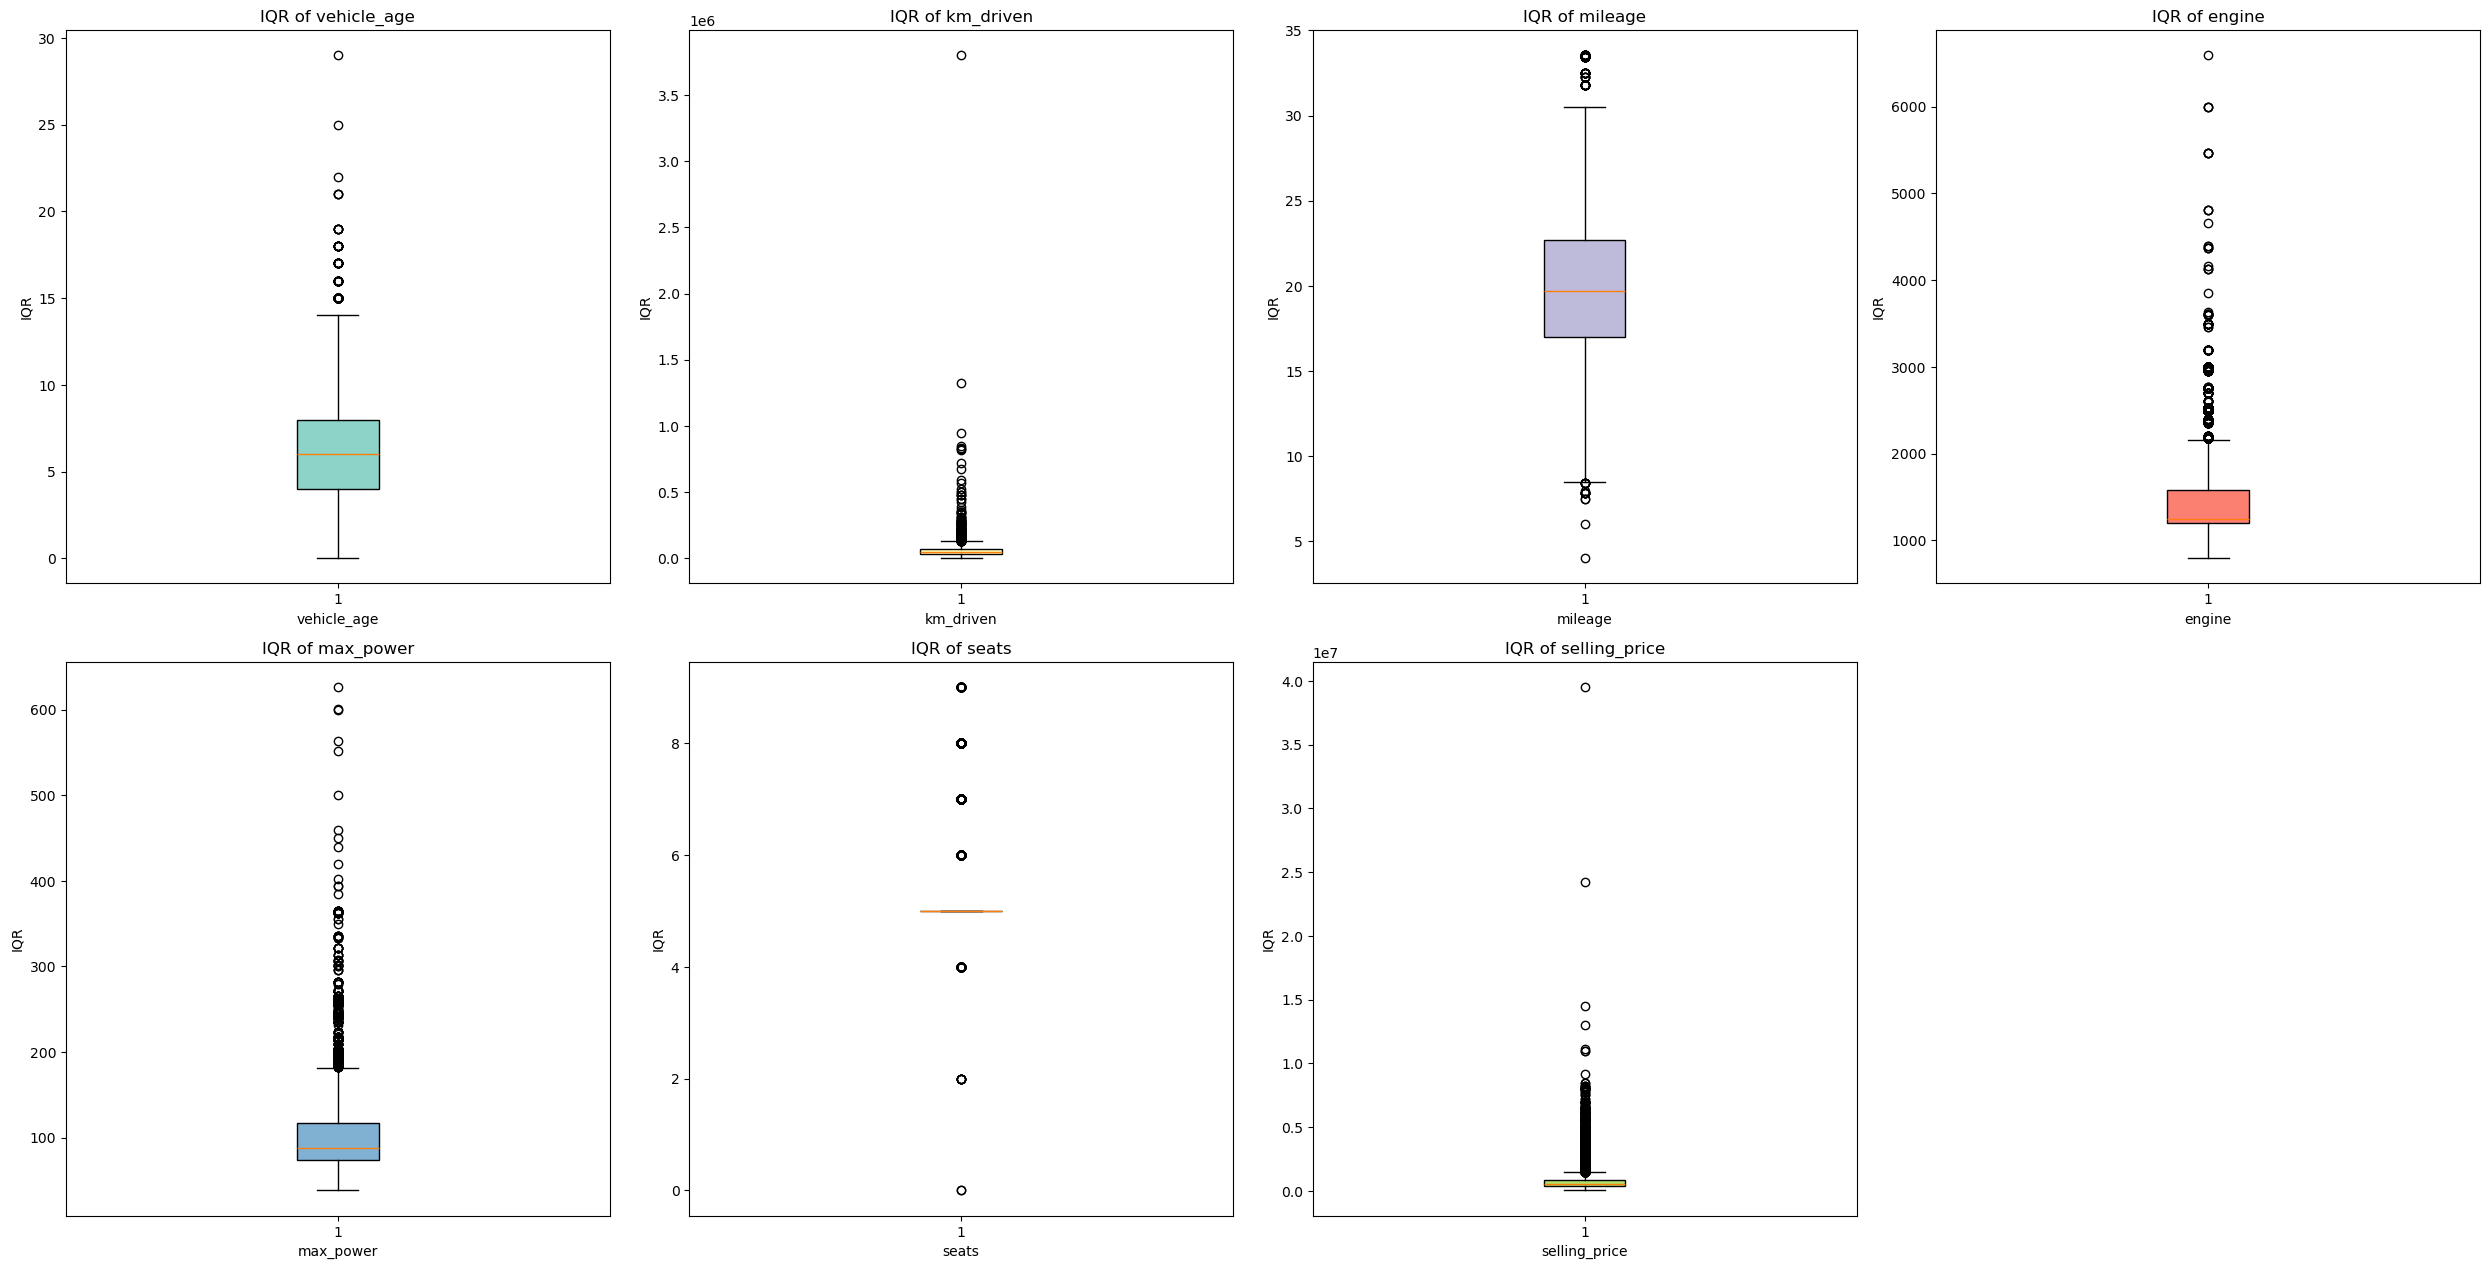

In [7]:
# Outliers using box-plot

# number of columns to plot:
num_cols = len(num_features)
colors = sns.color_palette("Set3", num_cols)

# # create subplots
fig, axes = plt.subplots(4,4,figsize=(25,25))

print(fig)
print(axes.shape)

# flatten the axes into 1d array
axes = axes.flatten()

for i,feature in enumerate(num_features):
    axes[i].boxplot(df[feature],patch_artist=True,boxprops=dict(facecolor=colors[i],color='black'))
    axes[i].set_title(f'IQR of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('IQR')

# Hiding unused subplots
for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])  # Remove unused axes

plt.tight_layout()
plt.show()


In [8]:
df.to_csv(r'C:\Users\Nitin Flavier\Desktop\Data Nexus\Data Science\ML_BootCamp\ML_Algos\Random_Forest\Dataset\updated_used_car_price.csv',index=False)